length of dataset:  10


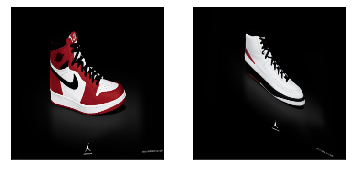

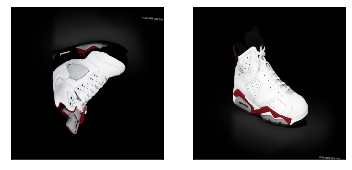

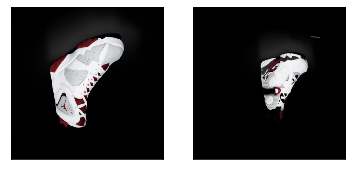

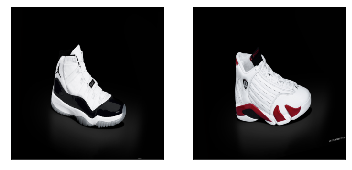

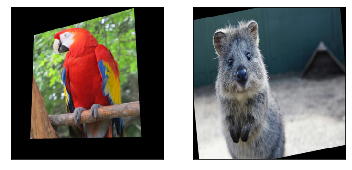

done!


In [56]:
import copy
import numpy as np
import os
from PIL import Image  
from matplotlib import pyplot as plt
import torch
from torch.autograd import Variable
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader


def get_transform(transforms, is_training):
    transforms_list = []
    #transforms_list.append(T.ToTensor())
    if is_training:
        transforms_list += transforms
    transforms_list.append(T.Resize((320, 320), interpolation=2))
    transforms_list.append(T.ToTensor())
    return T.Compose(transforms_list)


class PytorchDataset(Dataset):
    def __init__(self, images_dir, transforms=None):
        # load all image files, sorting them to
        # ensure that they are aligned
        imgs = list(sorted(os.listdir(images_dir)))
        self.imgs = [os.path.join(images_dir, i) for i in imgs]
        self.transforms = transforms


    def __getitem__(self, index):
        path = self.imgs[index]
        label = None
        image = Image.open(path).convert("RGB")
        if self.transforms is not None:
            image = self.transforms(image)
        return image#, label


    def __len__(self):
        return len(self.imgs)


trans = [ 
              # Transforms on PIL Image
#               T.CenterCrop(10), 
#               T.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0),
#               T.FiveCrop(10),
#               T.Grayscale(num_output_channels=1),
#               T.Pad(padding=10, fill=0, padding_mode='constant'),
#               T.RandomAffine(degrees=15, translate=None, scale=None, shear=None, resample=False, fillcolor=0),
#               T.RandomCrop(size=10, padding=None, pad_if_needed=False, fill=0, padding_mode='constant'),
#               T.RandomGrayscale(p=0.1),
#               T.RandomHorizontalFlip(p=0.5),
              T.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3),
#               T.RandomResizedCrop(size=10, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2),
              T.RandomRotation(degrees=15, resample=False, expand=False, center=None),# fill=0),
              T.RandomVerticalFlip(p=0.5),
#               T.TenCrop(size=10, vertical_flip=False),
    
              # Transforms on torch.*Tensor
              #T.LinearTransformation(transformation_matrix, mean_vector),
#               T.Normalize(0.5, 0.5, inplace=False),
              #T.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
              # CLASS torchvision.transforms.ToPILImage(mode=None)
              # CLASS torchvision.transforms.ToTensor
             ]

# trans = [T.RandomGrayscale(p=0.1)]

# power_trans =T.RandomOrder(trans) # Apply a list of transformations in a random order
# power_trans =T.RandomChoice(trans) # Apply single transformation randomly picked from a list
power_trans =T.RandomApply(trans, p=1) # Apply randomly a list of transformations with a given probability
 
images_dir = "../data"
batch_size = 2
shuffle = False
num_workers = 0
dataset = PytorchDataset(images_dir, get_transform(trans, is_training=True))
print("length of dataset: ", len(dataset))


dataLoader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, drop_last=True)

def pthtensor2ndarray(image):
    return np.transpose(image.numpy(), (1,2,0))

for idx, item in enumerate(dataLoader):
    images = item
    plt.figure()
    for i in range(1,images.size()[0]+1):
        plt.subplot(1,batch_size,i)
        plt.imshow(tensor2ndarray(images[i-1]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
print("done!")